# DS105 Airbnb Project

## Contents:
1. **[Reading Data](#Reading)**
2. **[Cleaning Data](#Cleaning)**
3. **[Data Exploration](#Exploration)**
    1. **[Distribution of Median Prices](#Price_Distribution)**
    2. **[Heat Map](#Heatmap)**
    3. **[Superhost](#Superhost)**
    4. **[Verified Identity](#Verified)**
    5. **[Instantly Bookable](#Instant_Book)**
    6. **[Total Number of Listings Per Host](#Total_Listings)**
    7. **[Number of Guests Accommodated](#Accommodates)**
    8. **[Neighbourhood](#Neighbourhood)**
    9. **[Property Type](#Property)**
    10. **[Room Type](#Room)**
    11. **[Beds and Bedrooms](#Beds)**
    12. **[Bathrooms](#Bathrooms)**
    13. **[Availability 365](#Availability)**
    14. **[Minimum Nights](#Minimum)**

<a id="Reading"></a>
## Reading Data

Use `pandas` to read excel files:

In [1]:
import numpy as np
import pandas as pd

In [2]:
cols = [
    "id",
    "host_id",
    "host_is_superhost",
    "host_identity_verified",
    "host_total_listings_count",
    "neighbourhood_cleansed",
    "instant_bookable",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms_text",
    "bedrooms",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "availability_365",
    "number_of_reviews",
    "review_scores_rating",
    "review_scores_location",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_accuracy"
]

df = pd.read_csv("listings 2.csv", usecols=cols)

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
df

,id,host_id,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,...,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable
0,13913,54730,f,3.0,t,Islington,Private room in rental unit,Private room,2,1 shared bath,...,1,361,22,4.86,4.80,4.85,4.80,4.90,4.65,f
1,15400,60302,f,1.0,t,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1 bath,...,3,4,89,4.79,4.84,4.88,4.87,4.82,4.93,f
2,17402,67564,f,18.0,t,Westminster,Entire rental unit,Entire home/apt,6,2 baths,...,4,295,43,4.69,4.80,4.68,4.66,4.66,4.85,f
3,17506,67915,f,3.0,t,Hammersmith and Fulham,Private room in townhouse,Private room,2,1 private bath,...,3,364,0,NaN,NaN,NaN,NaN,NaN,NaN,f
4,25123,103583,f,3.0,t,Barnet,Private room in residential home,Private room,2,1.5 shared baths,...,10,0,129,4.78,4.70,4.94,4.91,4.89,4.45,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66636,53709893,96150452,t,13.0,t,Croydon,Entire condominium (condo),Entire home/apt,6,1 bath,...,2,253,0,NaN,NaN,NaN,NaN,NaN,NaN,f
66637,53710986,125392965,f,9.0,t,Ealing,Entire condominium (condo),Entire home/apt,8,2.5 baths,...,3,260,0,NaN,NaN,NaN,NaN,NaN,NaN,t
66638,53711668,285590054,t,5.0,t,Haringey,Entire bungalow,Entire home/apt,4,2 baths,...,5,73,0,NaN,NaN,NaN,NaN,NaN,NaN,t
66639,53712786,379423186,f,4.0,t,Kensington and Chelsea,Entire rental unit,Entire home/apt,4,2.5 baths,...,7,365,0,NaN,NaN,NaN,NaN,NaN,NaN,t


<a id="Cleaning"></a>
## Cleaning Data

Set `id` to index

In [5]:
df = df.set_index("id")

Determine number of missing entries in each column

In [6]:
df.isna().sum()

host_id                            0
host_is_superhost                 59
host_total_listings_count         59
host_identity_verified            59
neighbourhood_cleansed             0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                   244
bedrooms                        4017
beds                            3646
amenities                          0
price                              0
minimum_nights                     0
availability_365                   0
number_of_reviews                  0
review_scores_rating           18559
review_scores_accuracy         19877
review_scores_cleanliness      19866
review_scores_checkin          19916
review_scores_communication    19880
review_scores_location         19917
instant_bookable                   0
dtype: int64

Remove null values

In [7]:
df = df.dropna(subset = ["host_is_superhost", "host_total_listings_count", "bathrooms_text", "bedrooms", "beds"])

df

,host_id,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,...,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,
15400,60302,f,1.0,t,Kensington and Chelsea,Entire rental unit,Entire home/apt,2,1 bath,1.0,...,3,4,89,4.79,4.84,4.88,4.87,4.82,4.93,f
17402,67564,f,18.0,t,Westminster,Entire rental unit,Entire home/apt,6,2 baths,3.0,...,4,295,43,4.69,4.80,4.68,4.66,4.66,4.85,f
17506,67915,f,3.0,t,Hammersmith and Fulham,Private room in townhouse,Private room,2,1 private bath,1.0,...,3,364,0,NaN,NaN,NaN,NaN,NaN,NaN,f
33332,144444,f,2.0,t,Hounslow,Private room in residential home,Private room,2,1 private bath,1.0,...,2,362,11,4.55,4.50,4.60,4.70,4.80,4.80,f
36299,155938,f,1.0,t,Richmond upon Thames,Entire townhouse,Entire home/apt,5,1.5 baths,3.0,...,3,300,86,4.82,4.81,4.80,4.94,4.96,4.90,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53709893,96150452,t,13.0,t,Croydon,Entire condominium (condo),Entire home/apt,6,1 bath,3.0,...,2,253,0,NaN,NaN,NaN,NaN,NaN,NaN,f
53710986,125392965,f,9.0,t,Ealing,Entire condominium (condo),Entire home/apt,8,2.5 baths,3.0,...,3,260,0,NaN,NaN,NaN,NaN,NaN,NaN,t
53711668,285590054,t,5.0,t,Haringey,Entire bungalow,Entire home/apt,4,2 baths,2.0,...,5,73,0,NaN,NaN,NaN,NaN,NaN,NaN,t


Remove strings (characters) from `bathrooms_text`

In [8]:
df["bathrooms_text"] = df["bathrooms_text"].str.replace(r"\D+", "", regex = True)

Rename columns

In [9]:
df = df.rename(columns = {"bathrooms_text":"bathrooms", "neighbourhood_cleansed":"neighbourhood"})

Convert `price` and `bathrooms` from string to float

In [10]:
df["price"] = df.price.str.replace("[$,]", "",regex=True).astype("float")
df["bathrooms"] = pd.to_numeric(df["bathrooms"], downcast="float")

Replace "f" and "t" with values "0" and "1" respectively

In [11]:
df.replace({'f': 0, 't': 1}, inplace=True)

Drop inconsistent values, where `accommodates`, `bedrooms`, `beds` and `price` have a value of 0

In [12]:
df = df[df.accommodates != 0]
df = df[df.bedrooms != 0]
df = df[df.beds != 0]
df = df[df.price != 0]

In [13]:
df.describe()

,host_id,host_is_superhost,host_total_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable
count,5.912500e+04,59125.000000,59125.000000,59125.000000,59125.000000,58880.000000,59125.000000,59125.000000,59125.000000,59125.000000,59125.000000,59125.000000,43375.000000,42191.000000,42201.000000,42150.000000,42184.000000,42151.000000,59125.000000
mean,1.000541e+08,0.142444,48.126698,0.797345,3.108939,3.923115,1.504186,1.790664,146.137624,6.141057,94.780195,15.827687,4.548797,4.740355,4.627238,4.796858,4.812705,4.748323,0.329167
std,1.109490e+08,0.349508,287.314190,0.401981,1.969188,6.889027,0.886535,1.286322,336.090924,27.607531,131.851895,36.682769,0.908788,0.500333,0.578394,0.463291,0.459006,0.421986,0.469915
min,2.010000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.658244e+07,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,47.000000,1.000000,0.000000,0.000000,4.500000,4.690000,4.500000,4.790000,4.820000,4.670000,0.000000
50%,4.871825e+07,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,85.000000,2.000000,0.000000,3.000000,4.820000,4.910000,4.820000,4.960000,5.000000,4.880000,0.000000
75%,1.551339e+08,0.000000,3.000000,1.000000,4.000000,2.000000,2.000000,2.000000,150.000000,4.000000,175.000000,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000
max,4.348812e+08,1.000000,3750.000000,1.000000,16.000000,165.000000,16.000000,38.000000,18557.000000,1125.000000,365.000000,868.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


Limit prices to £1000 (explanation below)

In [14]:
maxVal = 1000
df['price'][df['price'] >= maxVal] = maxVal

<a id="Exploration"></a>
## Data Exploration

1. Plotting graphs of certain factors against `price` to determine their impact on the prices of Airbnb listings in London

2. Determine most important factors

3. Determine exact correlation with regression models

Import modules to plot graphs 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cmx
import matplotlib.colors as colors

<a id="Price_Distribution"></a>
## Distribution of Median Prices

In [16]:
print(f"Nightly advertised prices range from ${min(df.price)} to ${max(df.price)}.")

Nightly advertised prices range from $7.0 to $1000.0.


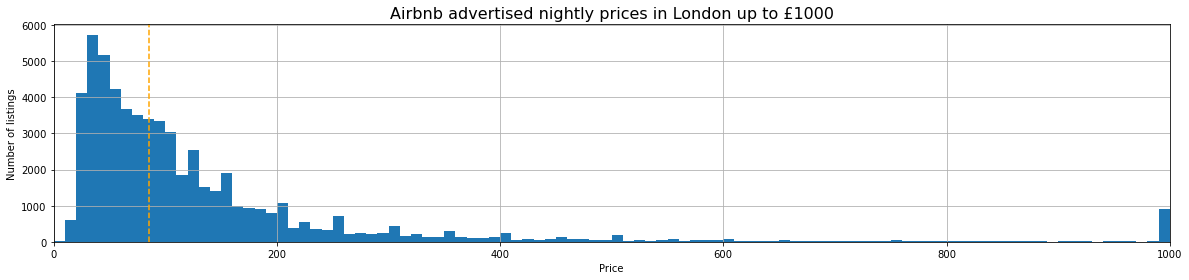

In [17]:
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(df["price"].median(), color="orange", linestyle="--")
plt.title("Airbnb advertised nightly prices in London up to £1000", fontsize=16)
plt.xlabel("Price")
plt.ylabel("Number of listings")
plt.show()

The orange dotted line indicates the median price of Airbnb listings.

<a id="Heatmap"></a>
## Heat Map

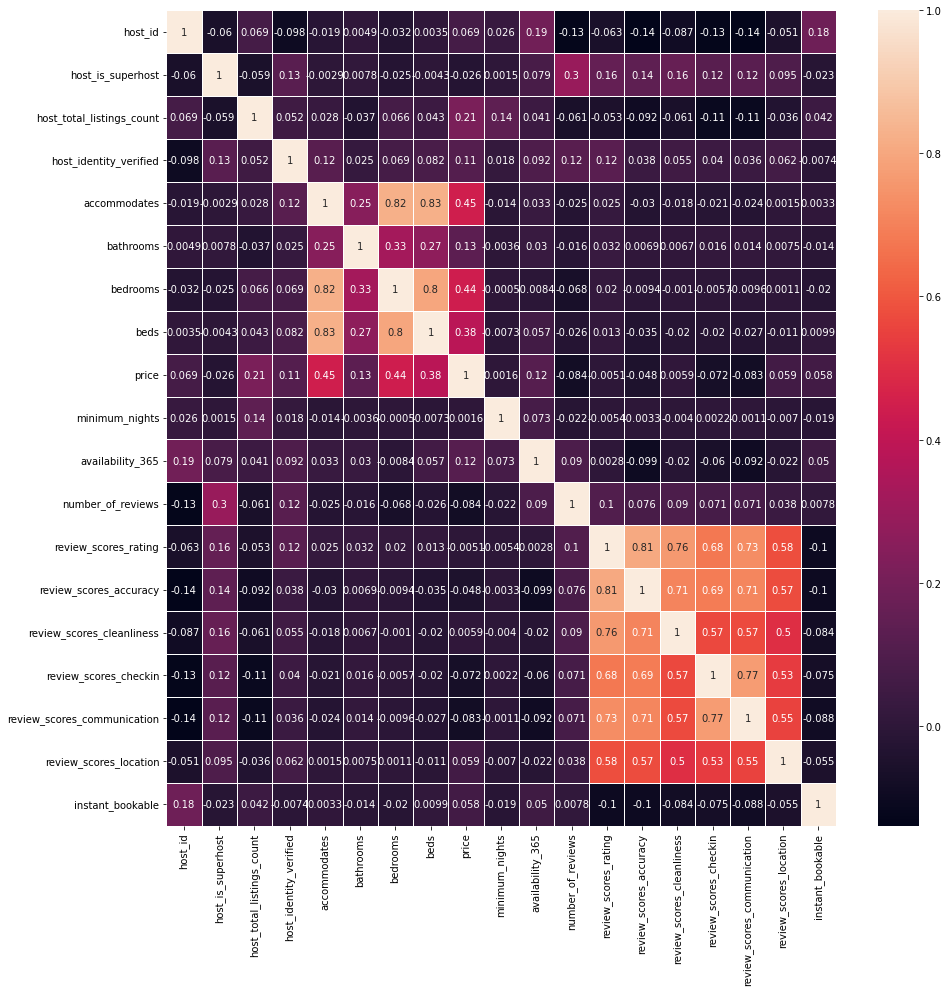

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax);

<a id="Superhost"></a>
## Superhost

Plot a bar chart of the frequency of listings that have superhosts and a bar chart of superhost vs median price

In [19]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category Count')
    ax1.set_xlabel('')
    
    df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median Price')
    ax2.set_xlabel('')
    
    plt.show()

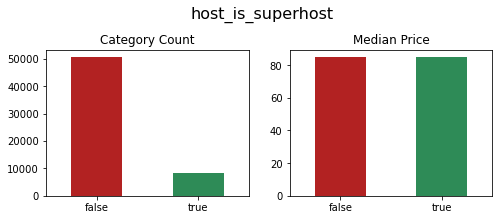

0    0.857556
1    0.142444
Name: host_is_superhost, dtype: float64


In [20]:
binary_count_and_price_plot('host_is_superhost')
print(df.host_is_superhost.value_counts(normalize=True))

<a id="Verified"></a>
## Verified Identity

Plot a bar chart of the frequency of listings that have verified hosts and a bar chart of verified identity vs median price

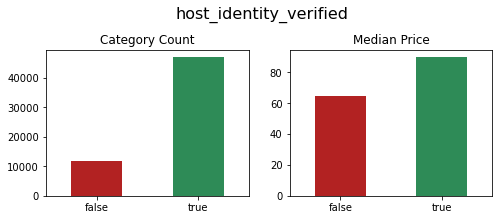

1    0.797345
0    0.202655
Name: host_identity_verified, dtype: float64


In [21]:
binary_count_and_price_plot('host_identity_verified')
print(df.host_identity_verified.value_counts(normalize=True))

<a id="Instant_Book"></a>
## Instantly Bookable

Plot a bar chart of the frequency of listings that are instantly bookable and a bar chart of instantly bookable vs median price

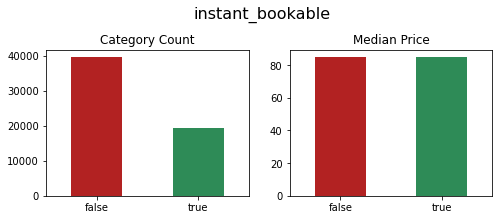

0    0.670833
1    0.329167
Name: instant_bookable, dtype: float64


In [22]:
binary_count_and_price_plot('instant_bookable')
print(df.instant_bookable.value_counts(normalize=True))

<a id="Total_Listings"></a>
## Total Number of Listings Per Host

In [23]:
print("Median number of listings per host:", int(df.host_total_listings_count.median()))
print("Mean number of listings per host:", int(round(df.host_total_listings_count.mean())))
print(f"{int(round(100*len(df[df.host_total_listings_count == 1])/len(df)))}% of listings are from hosts with one listing.")

Median number of listings per host: 1
Mean number of listings per host: 48
46% of listings are from hosts with one listing.


In [24]:
total_listings = df.groupby(['host_total_listings_count'])['price'].median().reset_index()
total_listings = total_listings.sort_values(by=['price'], ascending=True)
total_listings

,host_total_listings_count,price
84,167.0,8.0
48,51.0,35.0
54,61.0,45.0
52,59.0,49.0
71,110.0,54.0
...,...,...
92,211.0,578.0
90,193.0,1000.0
97,561.0,1000.0
98,570.0,1000.0


Plot a scatter plot of total listings per host vs median price

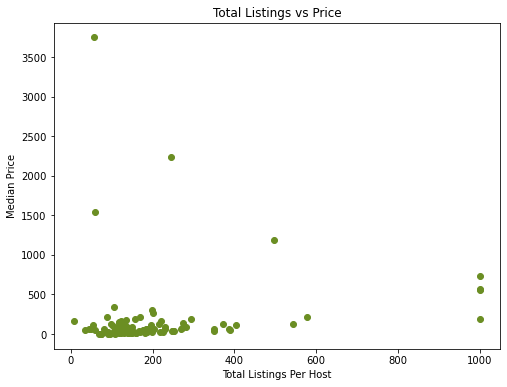

In [25]:
fig, ax = plt.subplots(figsize=[8, 6])
plt.scatter(total_listings['price'], total_listings['host_total_listings_count'], color='olivedrab')
plt.title('Total Listings vs Price')
plt.xlabel('Total Listings Per Host')
plt.ylabel('Median Price')
plt.show()

**Identifying outliers**

Calculate interquartile range for data

In [26]:
q1 = total_listings.quantile(0.25)
q3 = total_listings.quantile(0.75)
iqr = q3 - q1
iqr

host_total_listings_count     98.750
price                        102.625
dtype: float64

Establish a lower and upper limit for the outliers in the data, below or above which (respectively) will be considered outliers. 

In [27]:
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr
outliers = (total_listings < lower_lim) | (total_listings > upper_lim)

Calculate the number of outliers in the data for total listings 

In [28]:
outliers['host_total_listings_count'].value_counts()

False    95
True      9
Name: host_total_listings_count, dtype: int64

In [29]:
outliers['price'].value_counts()

False    94
True     10
Name: price, dtype: int64

Replace outliers with NaN (missing) 

In [30]:
total_listings.loc[total_listings['host_total_listings_count'] > upper_lim['host_total_listings_count'], 'host_total_listings_count'] = np.nan
total_listings.loc[total_listings['price'] > upper_lim['price'], 'price'] = np.nan

In [31]:
total_listings[total_listings.isna().any(axis = 1)]

,host_total_listings_count,price
103,NaN,57.0
101,NaN,60.0
96,NaN,105.5
95,NaN,198.0
102,NaN,244.0
51,58.0,NaN
46,48.0,NaN
72,112.0,NaN
100,NaN,NaN
79,129.0,NaN


Plot a scatter plot of total listings per host vs median price (after removing outliers)

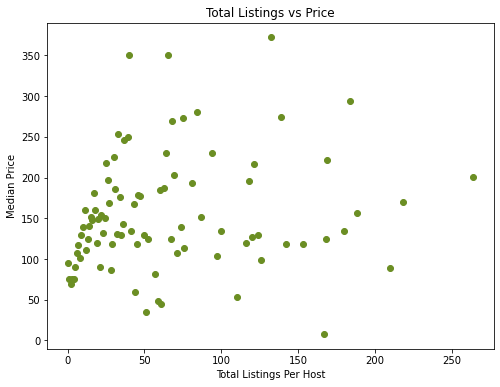

In [32]:
fig, ax = plt.subplots(figsize=[8, 6])
plt.scatter(total_listings['host_total_listings_count'], total_listings['price'], color='olivedrab')
plt.title('Total Listings vs Price')
plt.xlabel('Total Listings Per Host')
plt.ylabel('Median Price')
plt.show()     

Adding a line of best fit to determine the linear correlation between total listings per host and median prices
   
   - Drop NaN values first

In [33]:
total_listings2 = total_listings.dropna()

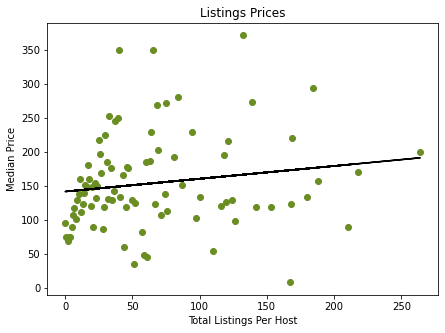

In [34]:
a, b = np.polyfit(total_listings2['host_total_listings_count'], total_listings2['price'], 1)
fig, ax = plt.subplots(figsize=[7, 5])
plt.scatter(total_listings2['host_total_listings_count'], total_listings2['price'], color='olivedrab')
plt.plot(total_listings2['host_total_listings_count'], a*total_listings2['host_total_listings_count']+b, color='black')
plt.title('Listings Prices')
plt.xlabel('Total Listings Per Host')
plt.ylabel('Median Price')
plt.show()

<a id="Accommodates"></a>
## Number of Guests Accommodated

Plot a bar chart of number of guests accommodated vs median price

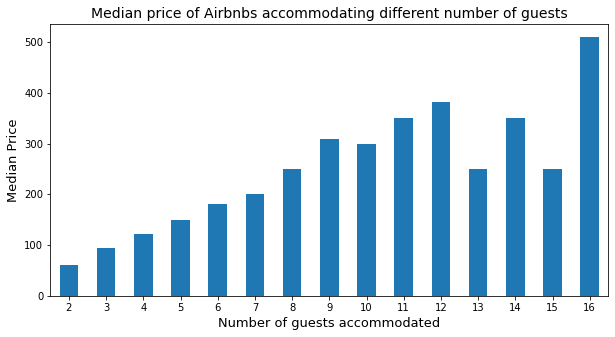

In [35]:
plt.figure(figsize=(10,5))
df.groupby("accommodates").price.median().plot(kind="bar")
plt.title("Median price of Airbnbs accommodating different number of guests", fontsize=14)
plt.xlabel("Number of guests accommodated", fontsize=13)
plt.ylabel("Median Price", fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

<a id="Neighbourhood"></a>
## Neighbourhood

In [36]:
col = [
    "neighbourhood_cleansed",
    "latitude",
    "longitude"
]

geo_df = pd.read_csv("/Users/joelle/Downloads/listings 2.csv", usecols=col)
geo_df

,neighbourhood_cleansed,latitude,longitude
0,Islington,51.568610,-0.112700
1,Kensington and Chelsea,51.487800,-0.168130
2,Westminster,51.521950,-0.140940
3,Hammersmith and Fulham,51.479350,-0.197430
4,Barnet,51.574380,-0.210810
...,...,...,...
66636,Croydon,51.419345,-0.079681
66637,Ealing,51.502002,-0.276895
66638,Haringey,51.599308,-0.114763
66639,Kensington and Chelsea,51.510407,-0.193729


In [37]:
import geopandas as gpd
from shapely.geometry import Polygon 

geo_df = gpd.GeoDataFrame(geometry = geo_df.groupby("neighbourhood_cleansed").apply(
      lambda g: Polygon(gpd.points_from_xy(geo_df["latitude"], geo_df["longitude"]))))

Creating a dataframe displaying the precise location of Airbnb listings according to their map coordinates 

In [38]:
gdf = gpd.GeoDataFrame(
    geo_df, geometry = gpd.points_from_xy(geo_df["longitude"], geo_df["latitude"]))

In [39]:
geo_df

,neighbourhood_cleansed,latitude,longitude,geometry
0,Islington,51.568610,-0.112700,POINT (-0.11270 51.56861)
1,Kensington and Chelsea,51.487800,-0.168130,POINT (-0.16813 51.48780)
2,Westminster,51.521950,-0.140940,POINT (-0.14094 51.52195)
3,Hammersmith and Fulham,51.479350,-0.197430,POINT (-0.19743 51.47935)
4,Barnet,51.574380,-0.210810,POINT (-0.21081 51.57438)
...,...,...,...,...
66636,Croydon,51.419345,-0.079681,POINT (-0.07968 51.41935)
66637,Ealing,51.502002,-0.276895,POINT (-0.27690 51.50200)
66638,Haringey,51.599308,-0.114763,POINT (-0.11476 51.59931)
66639,Kensington and Chelsea,51.510407,-0.193729,POINT (-0.19373 51.51041)


In [40]:
geo_df = geo_df.set_index("neighbourhood_cleansed")
geo_df = geo_df.rename_axis("borough")
geo_df

,latitude,longitude,geometry
borough,,,
Islington,51.568610,-0.112700,POINT (-0.11270 51.56861)
Kensington and Chelsea,51.487800,-0.168130,POINT (-0.16813 51.48780)
Westminster,51.521950,-0.140940,POINT (-0.14094 51.52195)
Hammersmith and Fulham,51.479350,-0.197430,POINT (-0.19743 51.47935)
Barnet,51.574380,-0.210810,POINT (-0.21081 51.57438)
...,...,...,...
Croydon,51.419345,-0.079681,POINT (-0.07968 51.41935)
Ealing,51.502002,-0.276895,POINT (-0.27690 51.50200)
Haringey,51.599308,-0.114763,POINT (-0.11476 51.59931)


In [41]:
borough_df = pd.DataFrame(geo_df.groupby("borough").size())
borough_df.rename(columns = {0: "number_of_listings"}, inplace = True)
borough_df['median_price'] = df.groupby("neighbourhood").price.median().values

# Joining the dataframes
borough_map_df = geo_df.join(borough_df)
borough_map_df

,latitude,longitude,geometry,number_of_listings,median_price
borough,,,,,
Barking and Dagenham,51.534300,0.081780,POINT (0.08178 51.53430),410,50.0
Barking and Dagenham,51.540720,0.152460,POINT (0.15246 51.54072),410,50.0
Barking and Dagenham,51.526100,0.118980,POINT (0.11898 51.52610),410,50.0
Barking and Dagenham,51.554990,0.159270,POINT (0.15927 51.55499),410,50.0
Barking and Dagenham,51.544850,0.162650,POINT (0.16265 51.54485),410,50.0
...,...,...,...,...,...
Westminster,51.517561,-0.138529,POINT (-0.13853 51.51756),7022,150.0
Westminster,51.517386,-0.169118,POINT (-0.16912 51.51739),7022,150.0
Westminster,51.519200,-0.161710,POINT (-0.16171 51.51920),7022,150.0


Plotting a map to show the median prices of listings according to location 

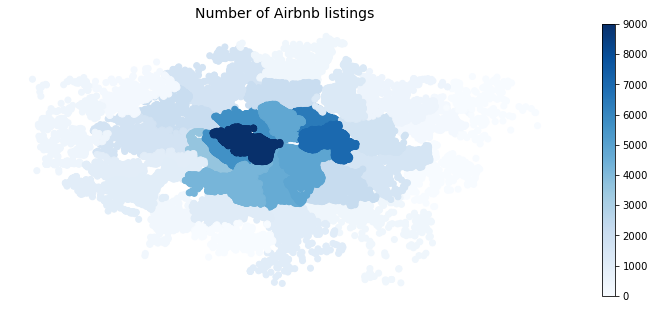

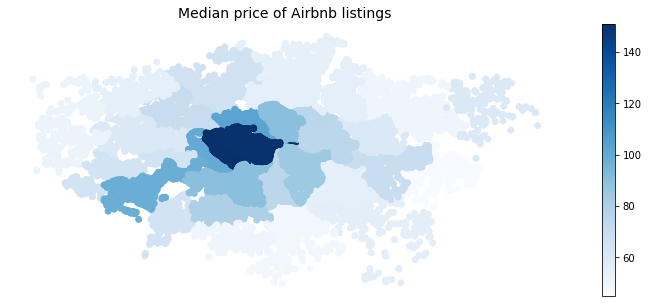

In [42]:
from geopandas import GeoDataFrame

# Finding number of Airbnb listings in each London borough
borough_map_df = GeoDataFrame(borough_map_df)
fig1, ax1 = plt.subplots(1, figsize = (14, 5))
borough_map_df.plot(column = "number_of_listings", cmap = "Blues", ax = ax1)
ax1.axis('off')
ax1.set_title("Number of Airbnb listings", fontsize = 14)
sm = plt.cm.ScalarMappable(cmap = "Blues", norm = plt.Normalize(vmin = 0, vmax = 9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Finding median price of Airbnb listings in each London Borough
fig2, ax2 = plt.subplots(1, figsize=(14, 5))
borough_map_df.plot(column = "median_price", cmap = "Blues", ax = ax2)
ax2.axis("off")
ax2.set_title("Median price of Airbnb listings", fontsize = 14)
sm = plt.cm.ScalarMappable(cmap = "Blues", norm = plt.Normalize(vmin = min(borough_map_df.median_price), vmax = max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

Plot a bar chart of neighbourhood vs median price

In [43]:
neighbourhood = df.groupby(['neighbourhood'])['price'].median().reset_index()
neighbourhood = neighbourhood.sort_values(by=['price'],ascending=False)
neighbourhood

,neighbourhood,price
19,Kensington and Chelsea,151.0
6,City of London,151.0
32,Westminster,150.0
5,Camden,103.0
12,Hammersmith and Fulham,100.0
26,Richmond upon Thames,98.0
18,Islington,90.0
31,Wandsworth,90.0
27,Southwark,85.0
23,Merton,80.0


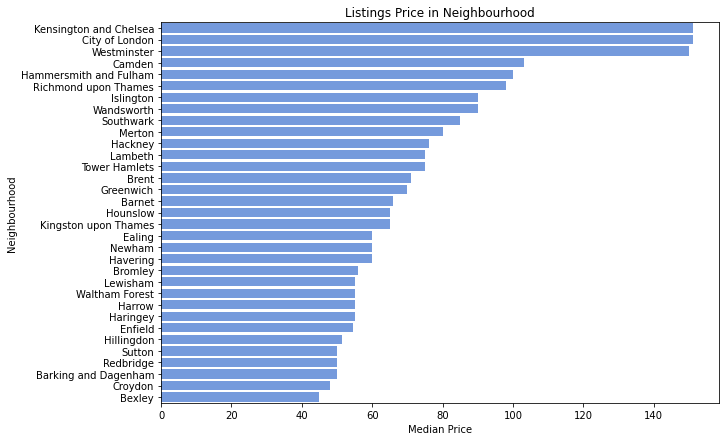

In [44]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x = 'price', y = 'neighbourhood', data = neighbourhood, ax = ax, color = 'cornflowerblue').set(xlabel = 'Median Price', ylabel = 'Neighbourhood', title = 'Listings Price in Neighbourhood');

<a id="Property"></a>
## Property Type

Calculate the number of property types

In [45]:
df["property_type"].nunique()

85

Grouping property types into categories

In [46]:
df.property_type.replace({
    'Entire condominium (condo)': 'Attached',
    'Private room in condominium (condo)': 'Attached',
    'Entire serviced apartment': 'Attached', 
    'Room in aparthotel': 'Attached',
    'Private room in hostel': 'Attached', 
    'Shared room in hostel': 'Attached',
    'Room in serviced apartment':'Attached',
    'Private room in serviced apartment': 'Attached',
    'Room in hostel': 'Attached', 
    'Shared room in condominium (condo)': 'Attached',
    'Shared room in serviced apartment': 'Attached',
    'Room in serviced apartment': 'Attached',
    'Room in boutique hotel': 'Attached', 
    'Room in hotel': 'Attached', 
    'Entire guest suite': 'Attached',
    'Private room in guest suite': 'Attached',
    'Private room in bed and breakfast': 'Attached',
    'Private room in guesthouse': 'Attached',
    'Entire guesthouse': 'Attached',
    'Room in bed and breakfast': 'Attached',
    'Private room in dome house': 'Attached',
    'Shared room in hotel': 'Attached',
    'Shared room in boutique hotel': 'Attached',
    'Shared room in bed and breakfast': 'Attached',
    'Shared room in guesthouse': 'Attached',
    'Shared room': 'Attached',
    'Shared room in guest suite': 'Attached',
    'Private room': 'Attached',
    }, inplace = True)

In [47]:
df.property_type.replace({
    'Private room in townhouse': 'Freestanding',
    'Entire townhouse': 'Freestanding',
    'Shared room in townhouse': 'Freestanding',
    'Entire rental unit': 'Freestanding',
    'Private room in rental unit': 'Freestanding',
    'Private room in residential home': 'Freestanding',
    'Entire residential home': 'Freestanding',
    'Shared room in rental unit': 'Freestanding',
    'Shared room in residential home': 'Freestanding',
    'Private room in bungalow': 'Freestanding',
    'Entire cottage': 'Freestanding',
    'Entire bungalow': 'Freestanding',
    'Private room in cottage': 'Freestanding',
    'Tiny house': 'Freestanding',
    'Entire cabin': 'Freestanding',
    'Entire home/apt': 'Freestanding',
    'Private room in tiny house': 'Freestanding',
    'Shared room in bungalow': 'Freestanding',
    'Private room in cabin': 'Freestanding',
    'Private room in farm stay': 'Freestanding',
    'Shared room in farm stay': 'Freestanding',
    'Room in rental unit': 'Freestanding',
    'Earth house': 'Freestanding',
    'Entire place': 'Freestanding',
    }, inplace = True)

In [48]:
df.property_type.replace({
    'Private room in casa particular': 'Luxury',
    'Entire villa': 'Luxury',
    'Private room in villa': 'Luxury',
    'Entire vacation home': 'Luxury',
    'Private room in vacation home': 'Luxury',
    'Entire chalet': 'Luxury',
    'Private room in chalet': 'Luxury',
    'Casa particular': 'Luxury',
    'Shared room in villa': 'Luxury',
    }, inplace = True)

df.loc[~df.property_type.isin(['Attached', 'Freestanding', 'Luxury']), 'property_type'] = 'Other'

In [49]:
def category_count_plot(col, figsize=(10,6)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

Determine the number of listings for each property type

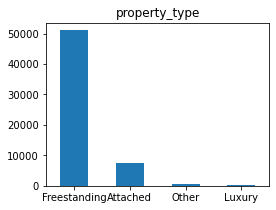

Freestanding    0.862410
Attached        0.125581
Other           0.010233
Luxury          0.001776
Name: property_type, dtype: float64


In [50]:
for col in ['property_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

Plot a bar chart of property type vs median price

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Attached'),
  Text(1, 0, 'Freestanding'),
  Text(2, 0, 'Luxury'),
  Text(3, 0, 'Other')])

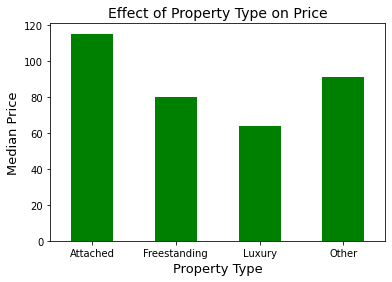

In [51]:
plt.figure(figsize=(6,4))
df.groupby("property_type").price.median().plot(kind="bar", color='green')
plt.title("Effect of Property Type on Price", fontsize=14)
plt.xlabel("Property Type", fontsize=13)
plt.ylabel("Median Price", fontsize=13)
plt.xticks(rotation = 0)

<a id="Room"></a>
## Room Type

Replace Hotel room with Private room, since there are only 3 types of rooms shown on the Airbnb website.

In [52]:
df.room_type.replace({
    'Hotel room': 'Private room' 
    }, inplace=True)

Determine the number of listings for each room type

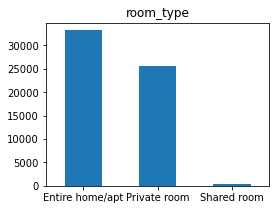

Entire home/apt    0.560677
Private room       0.432592
Shared room        0.006732
Name: room_type, dtype: float64


In [53]:
for col in ['room_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

Plot a bar chart of room type vs median price

(array([0, 1, 2]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Private room'),
  Text(2, 0, 'Shared room')])

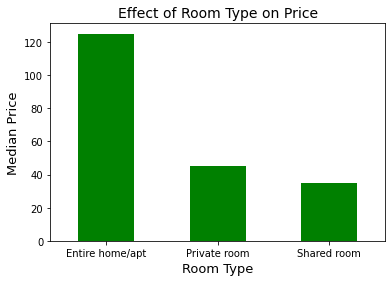

In [54]:
plt.figure(figsize=(6,4))
df.groupby("room_type").price.median().plot(kind="bar", color="green")
plt.title("Effect of Room Type on Price", fontsize=14)
plt.xlabel("Room Type", fontsize=13)
plt.ylabel("Median Price", fontsize=13)
plt.xticks(rotation = 0)

<a id="Beds"></a>
## Beds and Bedrooms

In [55]:
beds = df.groupby(['beds'])['price'].median().reset_index()
beds = beds.sort_values(by=['price'],ascending=False)
beds['beds'] = beds['beds'].astype(int)
beds

,beds,price
21,24,1000.0
24,29,1000.0
19,20,1000.0
18,19,1000.0
17,18,1000.0
16,17,850.0
15,16,559.0
25,38,441.0
8,9,350.0
12,13,350.0


Plot a bar chart of numbers beds vs median price

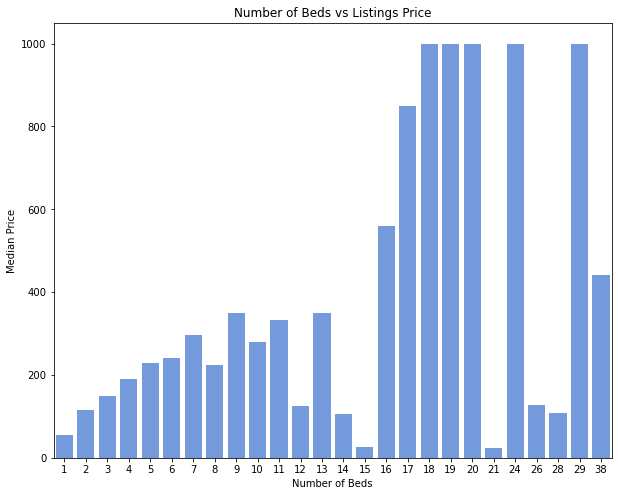

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = 'beds', y = 'price', data = beds, ax = ax, color = 'cornflowerblue').set(xlabel = 'Number of Beds', ylabel = 'Median Price', title = 'Number of Beds vs Listings Price');

In [57]:
bedrooms = df.groupby(['bedrooms'])['price'].median().reset_index()
bedrooms = bedrooms.sort_values(by=['price'],ascending=False)
bedrooms['bedrooms'] = bedrooms['bedrooms'].astype(int)
bedrooms

,bedrooms,price
10,11,1000.0
7,8,877.0
6,7,571.5
8,9,479.5
11,12,398.0
5,6,395.0
9,10,370.0
4,5,333.0
3,4,250.0
2,3,190.0


Plot a bar chart of number of bedrooms vs median price

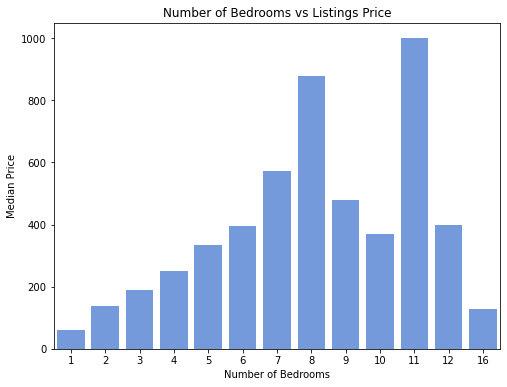

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x = 'bedrooms', y = 'price', data = bedrooms, ax = ax, color = 'cornflowerblue').set(xlabel = 'Number of Bedrooms', ylabel = 'Median Price', title = 'Number of Bedrooms vs Listings Price');

<a id="Bathrooms"></a>
## Bathrooms

In [59]:
df['bathrooms'].describe()

count    58880.000000
mean         3.923115
std          6.889027
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        165.000000
Name: bathrooms, dtype: float64

In [60]:
bathrooms = df.groupby(['bathrooms'])['price'].median().reset_index()
bathrooms = bathrooms.sort_values(by=['price'],ascending=False)
bathrooms['bathrooms'] = bathrooms['bathrooms'].astype(int)
bathrooms

,bathrooms,price
10,10,1000.0
14,17,1000.0
19,65,1000.0
11,12,699.0
5,5,671.0
22,105,549.0
4,4,490.0
17,45,471.0
20,75,457.5
9,9,441.0


Determine the number of Airbnb listings with a certain number of bathrooms

In [61]:
df['bathrooms'].value_counts()

1.0      39872
2.0       8362
15.0      6665
25.0      1898
3.0       1058
35.0       444
4.0        205
0.0        149
45.0       103
5.0         53
6.0         21
55.0        17
65.0         9
7.0          7
8.0          4
75.0         2
105.0        2
12.0         2
85.0         1
17.0         1
10.0         1
9.0          1
16.0         1
165.0        1
125.0        1
Name: bathrooms, dtype: int64

Plot a scatter plot of number of bathrooms vs median price

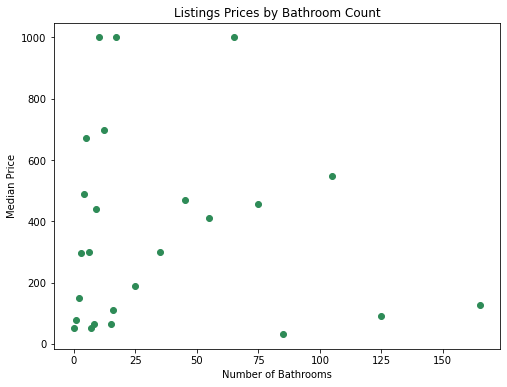

In [62]:
fig, ax = plt.subplots(figsize=[8, 6])
plt.scatter(bathrooms['bathrooms'], bathrooms['price'], color='seagreen')
plt.title('Listings Prices by Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Median Price')
plt.show()

Add a line of best fit to determine linear correlation

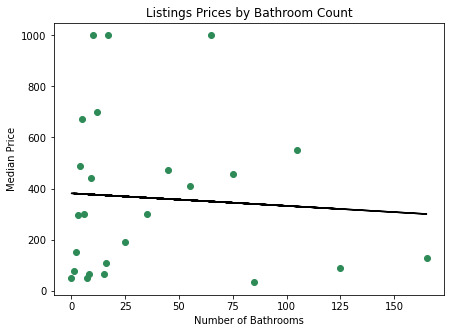

In [63]:
a, b = np.polyfit(bathrooms['bathrooms'], bathrooms['price'], 1)
fig, ax = plt.subplots(figsize=[7, 5])
plt.scatter(bathrooms['bathrooms'], bathrooms['price'], color='seagreen')
plt.plot(bathrooms['bathrooms'], a*bathrooms['bathrooms']+b, color='black')
plt.title('Listings Prices by Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Median Price')
plt.show()

<a id="Availability"></a>
## Availability 365

In [64]:
avail = df.groupby(['availability_365'])['price'].median().reset_index()
avail = avail.sort_values(by=['price'], ascending=True)
avail

,availability_365,price
312,312,49.0
98,98,50.0
200,200,59.5
68,68,60.0
172,172,60.0
...,...,...
277,277,190.0
182,182,207.0
236,236,214.0
194,194,216.0


Plot a scatter plot of the number of days available in a year vs median price

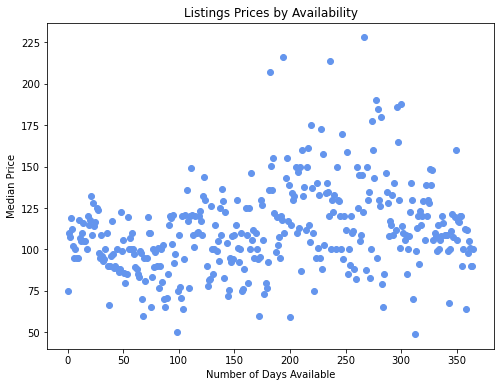

In [65]:
fig, ax = plt.subplots(figsize=[8, 6])
plt.scatter(avail['availability_365'], avail['price'], color='cornflowerblue')
plt.title('Listings Prices by Availability')
plt.xlabel('Number of Days Available')
plt.ylabel('Median Price')
plt.show()

Add a line of best fit to determine linear correlation 

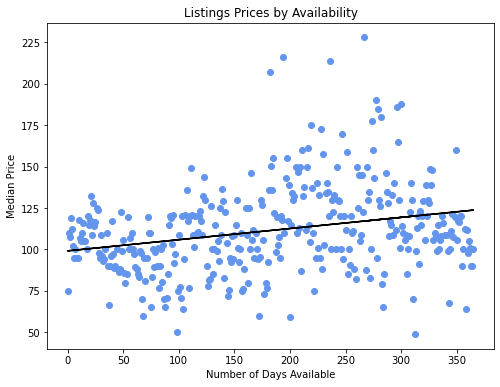

In [66]:
a, b = np.polyfit(avail['availability_365'], avail['price'], 1)
fig, ax = plt.subplots(figsize=[8, 6])
plt.scatter(avail['availability_365'], avail['price'], color='cornflowerblue')
plt.plot(avail['availability_365'], a*avail['availability_365']+b, color='black')
plt.title('Listings Prices by Availability')
plt.xlabel('Number of Days Available')
plt.ylabel('Median Price')
plt.show()

<a id="Minimum"></a>
## Minimum Nights

In [67]:
df['minimum_nights'].describe()

count    59125.000000
mean         6.141057
std         27.607531
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1125.000000
Name: minimum_nights, dtype: float64

In [68]:
minimum = df.groupby(['minimum_nights'])['price'].median().reset_index()
minimum = minimum.sort_values(by=['price'],ascending=False)
minimum

,minimum_nights,price
122,1124,1000.0
83,121,800.0
77,99,369.0
31,32,325.0
79,110,295.0
...,...,...
58,71,25.0
61,76,25.0
74,93,25.0
50,58,20.0


Plot a scatter plot of minimum number of nights vs median price

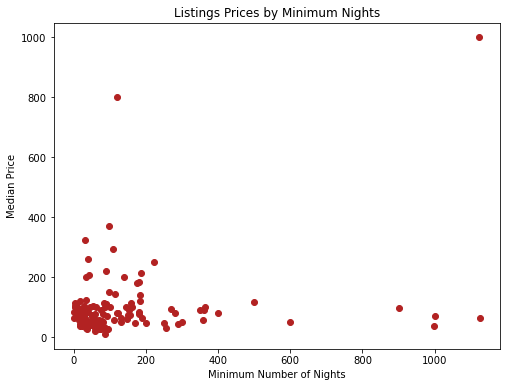

In [69]:
fig, ax = plt.subplots(figsize=[8, 6])
plt.scatter(minimum['minimum_nights'], minimum['price'], color='firebrick')
plt.title('Listings Prices by Minimum Nights')
plt.xlabel('Minimum Number of Nights')
plt.ylabel('Median Price')
plt.show()

We identified outliers the same way we identified those in the Total Listings vs Price graph.

In [70]:
q12 = minimum.quantile(0.25)
q32 = minimum.quantile(0.75)
iqr2 = q32 - q12
iqr2

minimum_nights    124.5
price              50.0
dtype: float64

In [71]:
lower_lim2 = q12 - 1.5*iqr2
upper_lim2 = q32 + 1.5*iqr2
outliers2 = (minimum < lower_lim2) | (minimum > upper_lim2)

In [72]:
minimum.loc[minimum['minimum_nights'] > upper_lim2['minimum_nights'], 'minimum_nights'] = np.nan
minimum.loc[minimum['minimum_nights'] < lower_lim2['minimum_nights'], 'minimum_nights'] = np.nan
minimum.loc[minimum['price'] > upper_lim2['price'], 'price'] = np.nan
minimum.loc[minimum['price'] < lower_lim2['price'], 'price'] = np.nan

In [73]:
minimum[minimum.isna().any(axis = 1)]

,minimum_nights,price
122,NaN,NaN
83,121.0,NaN
77,99.0,NaN
31,32.0,NaN
79,110.0,NaN
37,39.0,NaN
105,222.0,NaN
70,89.0,NaN
102,186.0,NaN
41,43.0,NaN


Plot a scatter plot of minimum number of nights vs median price (after removing outliers)

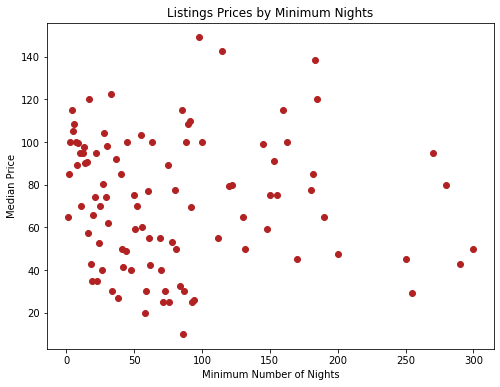

In [74]:
fig, ax = plt.subplots(figsize=[8, 6])
plt.scatter(minimum['minimum_nights'], minimum['price'], color='firebrick')
plt.title('Listings Prices by Minimum Nights')
plt.xlabel('Minimum Number of Nights')
plt.ylabel('Median Price')
plt.show()

Import `nltk` and download data

In [75]:
import nltk

In [76]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joelle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
reviews = pd.read_csv("/Users/joelle/Downloads/reviews.csv")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [78]:
reviews = reviews.drop(columns = ["id", "date", "reviewer_id", "reviewer_name"])
reviews = reviews.set_index("listing_id")
reviews = reviews.rename_axis("id")
reviews

,comments
id,
13913,My girlfriend and I hadn't known Alina before ...
13913,Alina was a really good host. The flat is clea...
13913,Alina is an amazing host. She made me feel rig...
13913,"Alina's place is so nice, the room is big and ..."
13913,"Nice location in Islington area, good for shor..."
...,...
53622933,Gregory is an absolutely amazing host! He went...
53629457,Those considering the aptm as a last minute bo...
53656459,One of the worst places I have ever stayed... ...


In [79]:
column = [
        "id", 
        "number_of_reviews",
        "review_scores_rating"
]

df1 = pd.read_csv("/Users/joelle/Downloads/listings 2.csv", usecols=column)

In [80]:
df1 = df1.set_index("id")

In [81]:
df1

,number_of_reviews,review_scores_rating
id,,
13913,22,4.86
15400,89,4.79
17402,43,4.69
17506,0,NaN
25123,129,4.78
...,...,...
53709893,0,NaN
53710986,0,NaN
53711668,0,NaN


In [82]:
reviews = pd.merge(df1, reviews, left_index = True, right_index = True)
reviews

,number_of_reviews,review_scores_rating,comments
id,,,
13913,22,4.86,My girlfriend and I hadn't known Alina before ...
13913,22,4.86,Alina was a really good host. The flat is clea...
13913,22,4.86,Alina is an amazing host. She made me feel rig...
13913,22,4.86,"Alina's place is so nice, the room is big and ..."
13913,22,4.86,"Nice location in Islington area, good for shor..."
...,...,...,...
53622933,1,5.00,Gregory is an absolutely amazing host! He went...
53629457,1,2.00,Those considering the aptm as a last minute bo...
53656459,1,1.00,One of the worst places I have ever stayed... ...


In [83]:
reviews[reviews.isna().any(axis = 1)]

,number_of_reviews,review_scores_rating,comments
id,,,
33332,11,4.55,NaN
75120,131,4.79,NaN
90549,127,4.90,NaN
107048,473,4.80,NaN
107051,529,4.91,NaN
...,...,...,...
51795260,9,5.00,NaN
51995358,9,5.00,NaN
52051745,98,4.61,NaN


In [84]:
reviews.isna().sum()

number_of_reviews         0
review_scores_rating      0
comments                494
dtype: int64

Change cells with null values to blanks, since the guests did not leave any written comments.

In [85]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

new_reviews = convert(reviews['comments'].fillna(""))

In [86]:
# Count word frequency
count = collections.Counter(new_reviews) 

clean_count = pd.DataFrame(count.most_common(5), columns = ["words", "count"])
clean_count.head()

,words,count
0,and,2087645
1,the,1884730
2,a,1329908
3,to,1194567
4,was,912066


**Removing stopwords**

In [87]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))
list(stopwords_list)[:10]

['itself',
 'who',
 'again',
 'by',
 'up',
 'shouldn',
 "that'll",
 "shouldn't",
 'ain',
 'my']

In [88]:
clean_reviews = [word for word in new_reviews if word not in stopwords_list]
word_review_count = collections.Counter(clean_reviews)

word_review_count_df = pd.DataFrame(word_review_count.most_common(15),
                             columns=["words", "count"])

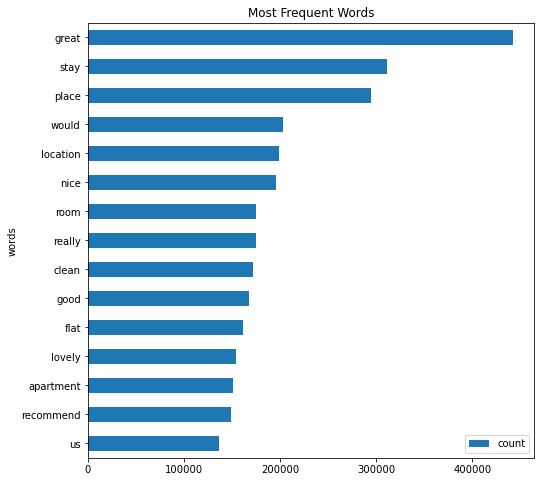

In [89]:
fig3, ax3 = plt.subplots(figsize = (8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by = "count").plot.barh(x = "words", 
                                                         y = "count", 
                                                         ax = ax3)

ax3.set_title("Most Frequent Words")

plt.show()

**Detecting positive and negative reviews**

**Determine effect of having high ratings/number of reviews on price**

In [90]:
df["review_scores_rating"].isna().sum()

15750

In [91]:
#turn NaN scores into 'No Reviews'
idx_vals = df['review_scores_rating'][df['number_of_reviews'] == 0].index.values.tolist()
df.loc[idx_vals, ('review_scores_rating')] = df['review_scores_rating'][df['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

#remove inconsistent NaN values
df = df[~df['review_scores_rating'].isnull()]

**Determine the effect of review score on prices**

We rounded the review score values to integers to make it easier to plot. 

In [92]:
df["review_scores_rating"] = df["review_scores_rating"].round(0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0')])

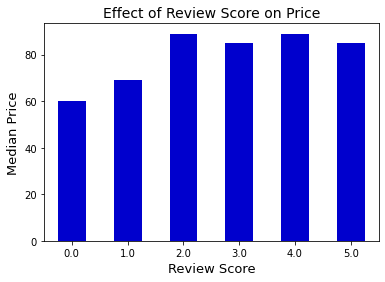

In [93]:
plt.figure(figsize=(6,4))
df.groupby("review_scores_rating").price.median().plot(kind="bar", color='mediumblue')
plt.title("Effect of Review Score on Price", fontsize=14)
plt.xlabel("Review Score", fontsize=13)
plt.ylabel("Median Price", fontsize=13)
plt.xticks(rotation = 0)